# Clasterisasi Sekolah Dasar Menggunakan K Means Clustering

Assalamualaikum w.w.

Ini merupakan python notebook untuk melakukan Klasterisasi Sekolah Dasar Menggunakan K-Means Clustering. Tujuan utama dari project ini adalah untuk membuat kelompok provinsi dengan SD kategori baik, sedang, dan rendah berdasarkan data jumlah guru, jumlah siswa dan jumlah sekolah.

### Library Import

In [248]:
!pip install yellowbrick

In [249]:
import pandas as pd                            #olah data tabel
import numpy as np                             #olah data numerik
import matplotlib.pyplot as plt                #visualisasi data
import seaborn as sns                          #visualisasi data
from mpl_toolkits import mplot3d
import plotly.express as plotly_express

import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer           # Elbow method
from sklearn.cluster import KMeans                         # K Means Clustering sklearn             

### Data

In [250]:
df = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/k_means_clustering/main/SD.csv', sep=';')

In [251]:
df.head()

,No,Provinsi,Sekolah,Guru,Murid
0,1,Aceh,3529,48541,486958
1,2,Sumatera Utara,9782,109585,1548652
2,3,Sumatera Barat,4260,46833,597218
3,4,Riau,3791,51378,773526
4,5,Jambi,2463,27161,368694


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        34 non-null     int64 
 1   Provinsi  34 non-null     object
 2   Sekolah   34 non-null     int64 
 3   Guru      34 non-null     int64 
 4   Murid     34 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [253]:
df.describe()

,No,Sekolah,Guru,Murid
count,34.000000,34.000000,34.000000,3.400000e+01
mean,17.500000,4381.617647,47220.852941,7.081327e+05
std,9.958246,5017.449255,50569.185611,8.970857e+05
min,1.000000,485.000000,6095.000000,7.852900e+04
25%,9.250000,1821.000000,18175.500000,2.178215e+05
50%,17.500000,2645.000000,27168.000000,3.975465e+05
75%,25.750000,4585.000000,53558.250000,7.714170e+05
max,34.000000,19659.000000,212849.000000,4.450934e+06


### Exploratory Data Analysis

#### 1. Check Missing Values

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        34 non-null     int64 
 1   Provinsi  34 non-null     object
 2   Sekolah   34 non-null     int64 
 3   Guru      34 non-null     int64 
 4   Murid     34 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [255]:
df.isnull().sum()

No          0
Provinsi    0
Sekolah     0
Guru        0
Murid       0
dtype: int64

<Axes: >

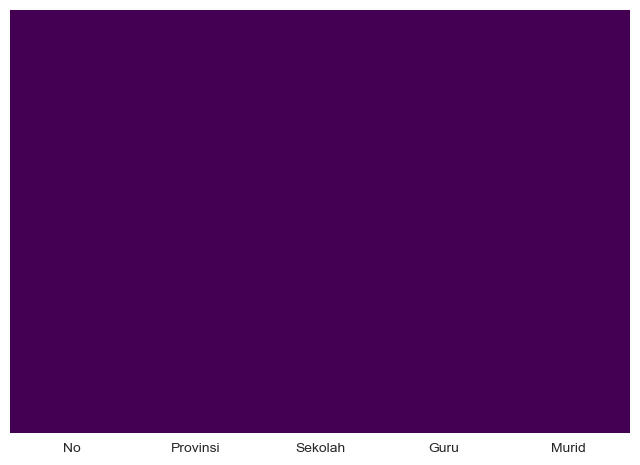

In [256]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Note : *Tidak ada Missing Values*

#### 2. Check Duplikasi Data

In [257]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
dtype: bool

Note : Tidak ada Duplikasi Data

#### 3. Check Outlier Pada Data

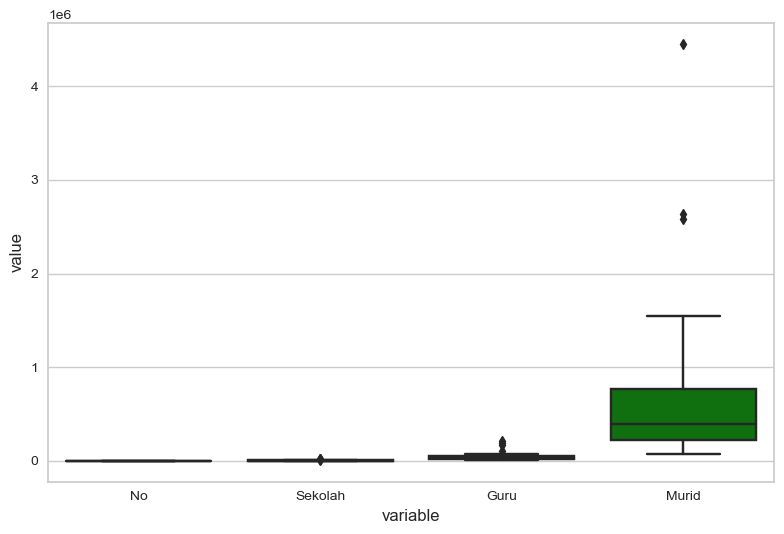

In [258]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Note : Terdapat Outlier di Variabe Murid dan Guru

#### 4. Check Korelasi Data

<Axes: >

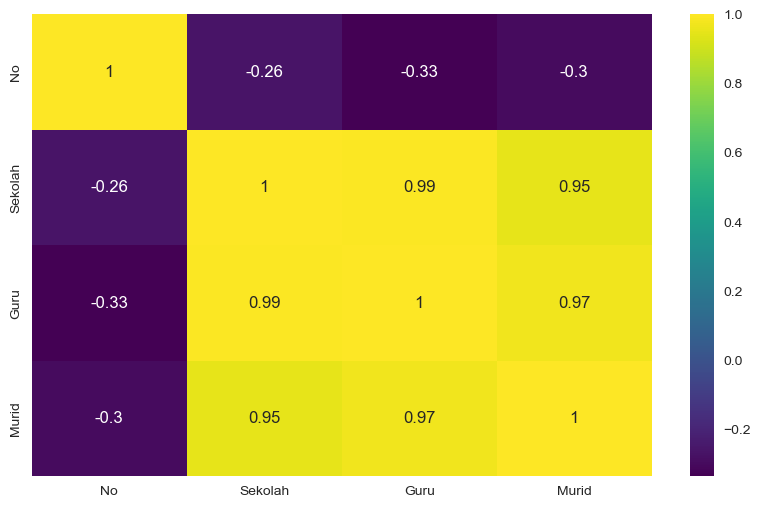

In [259]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Note : Terdapat Korelasi Tinggi antara jumlah Guru, Siswa, dan Sekolah (Make Sense sih)

#### 5. Check Distribusi Data

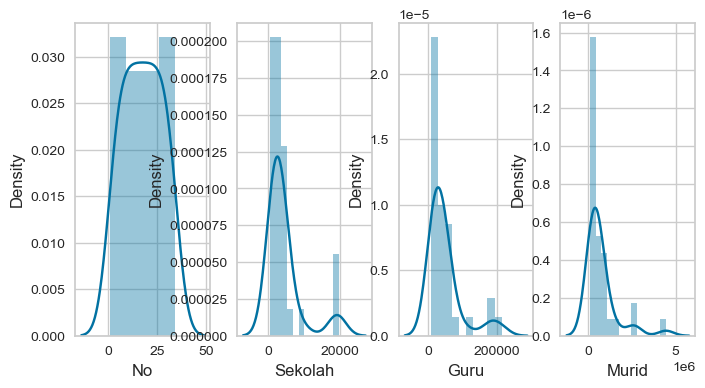

In [260]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(df)
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Note : Variabel Sekolah, Guru, dan Murid memiliki Distribusi Skew Kiri

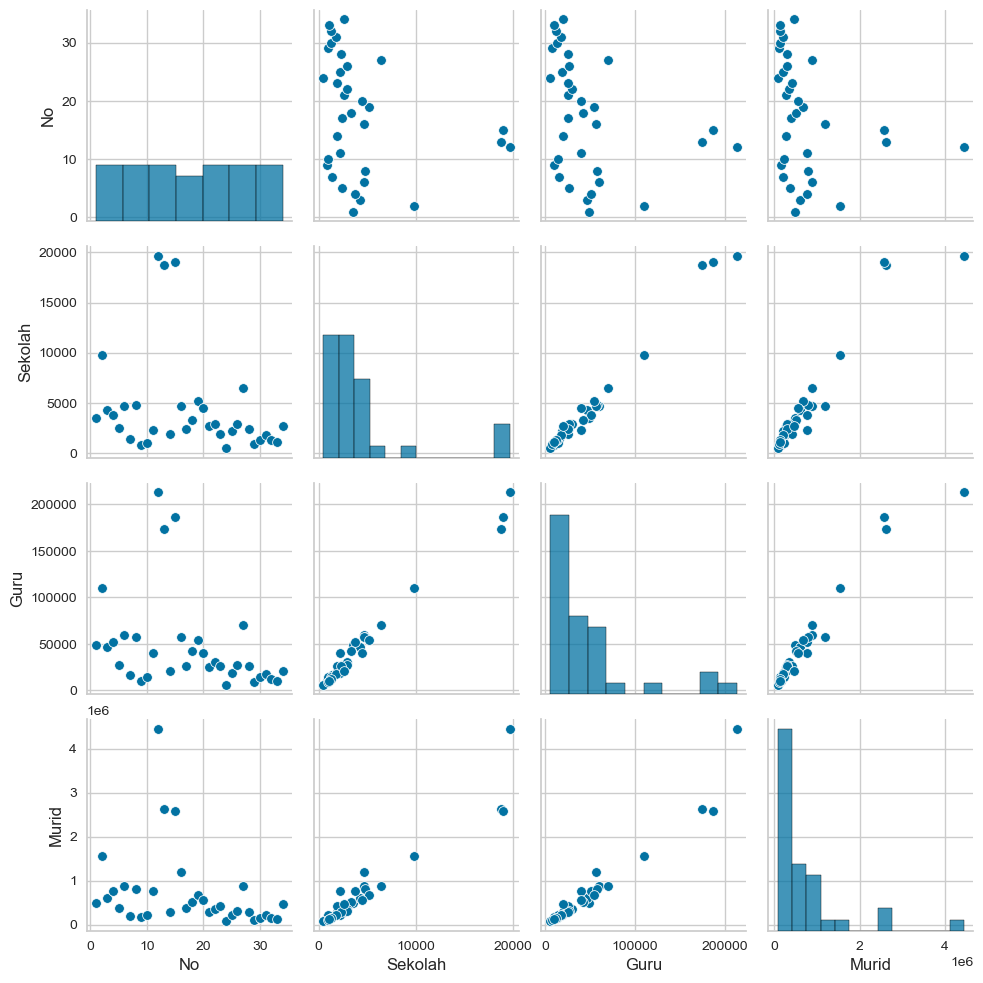

In [261]:
g = sns.pairplot(df1)

#### 6. Check Statistik Data

In [262]:
df.describe()

,No,Sekolah,Guru,Murid
count,34.000000,34.000000,34.000000,3.400000e+01
mean,17.500000,4381.617647,47220.852941,7.081327e+05
std,9.958246,5017.449255,50569.185611,8.970857e+05
min,1.000000,485.000000,6095.000000,7.852900e+04
25%,9.250000,1821.000000,18175.500000,2.178215e+05
50%,17.500000,2645.000000,27168.000000,3.975465e+05
75%,25.750000,4585.000000,53558.250000,7.714170e+05
max,34.000000,19659.000000,212849.000000,4.450934e+06


Note : Terdapat perbedaan Skala yang cukup signifikan antara variabel Sekolah, Guru, dan Murid

### Data Preprocessing

Dalam proses ini akan dilakukan beberapa langkah:

1. Mencari Outlier & Menghapus
2. Normalisasi Data

In [263]:
df_num = df[['Sekolah', 'Guru', 'Murid']]

#### 1. Mencari & Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [264]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

No             16.50
Sekolah      2764.00
Guru        35382.75
Murid      553595.50
dtype: float64


In [265]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,No,Provinsi,Sekolah,Guru,Murid
0,1,Aceh,3529,48541,486958
2,3,Sumatera Barat,4260,46833,597218
3,4,Riau,3791,51378,773526
4,5,Jambi,2463,27161,368694
5,6,Sumatera Selatan,4696,59861,882534
6,7,Bengkulu,1398,16035,194381
7,8,Lampung,4732,57711,799619
8,9,Kepulauan Bangka Belitung,832,9678,162722
9,10,Kepulauan Riau,973,14033,225575
10,11,DKI Jakarta,2239,40344,765090


In [266]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        30 non-null     int64 
 1   Provinsi  30 non-null     object
 2   Sekolah   30 non-null     int64 
 3   Guru      30 non-null     int64 
 4   Murid     30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ KB


In [267]:
#Outlier

In [268]:
df_outlier = df.iloc[[1,11,12,14]]
df_outlier

,No,Provinsi,Sekolah,Guru,Murid
1,2,Sumatera Utara,9782,109585,1548652
11,12,Jawa Barat,19659,212849,4450934
12,13,Jawa Tengah,18760,173671,2631174
14,15,Jawa Timur,19007,186798,2579913


In [269]:
figure = plotly_express.scatter_3d(df,
                 x='Guru', y='Murid',
                 z='Sekolah', color="Provinsi",
                 title="Sebaran Provinsi Berdasarkan Data Sekolah Dasar")
 
figure.update_layout(showlegend=True)
 
figure.show()

#### 3. Normalisasi Data

Dilakukan normalisasi data agar tidak berdistribusi skewed

In [270]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df2=df_clear.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

df_norm

,No,Sekolah,Guru,Murid
0,0.000000,0.511339,0.660032,0.368833
1,0.060606,0.634134,0.633473,0.468404
2,0.090909,0.555350,0.704147,0.627620
3,0.121212,0.332269,0.327575,0.262035
4,0.151515,0.707374,0.836057,0.726060
5,0.181818,0.153368,0.154566,0.104621
6,0.212121,0.713422,0.802625,0.651183
7,0.242424,0.058290,0.055715,0.076031
8,0.272727,0.081975,0.123435,0.132790
9,0.303030,0.294641,0.532569,0.620001


### Pemodelan Klasterisasi K Means

#### Rekomendasi Jumlah Klaster

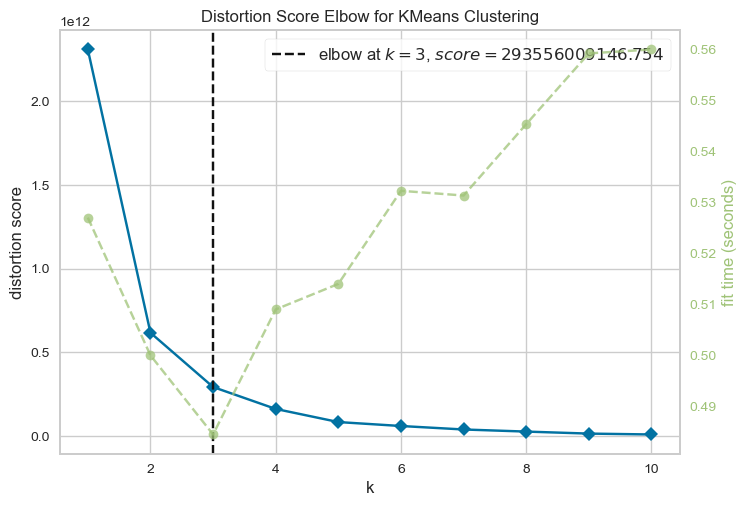

In [271]:
model = KMeans()                                               # Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(1, 11))                # Check the distortion/average distance in cluster if we create 1 to 11 group
visualizer.fit(df2)                                            # Fit the data to the visualizer
visualizer.show()                                              # Finalize and render the figure
plt.show()

Note : Jumlah Klaster Rekomendasi 3, sesuai dengan plan membagi data menjadi 3 klaster (Baik, Sedang, Rendah)

#### Pemodelan Klasterisasi

In [272]:
km_model = KMeans(n_clusters=3, random_state=10)              # instatiate KMeans class and set the number of clusters
cluster_result = km_model.fit_predict(df2)                    # call fit method with data 
centroids = km_model.cluster_centers_                         # coordinates of cluster center
labels = km_model.labels_                                     # cluster label for each data point

In [273]:
df_clear['Label'] = labels

In [274]:
df_clear

,No,Provinsi,Sekolah,Guru,Murid,Label
0,1,Aceh,3529,48541,486958,1
2,3,Sumatera Barat,4260,46833,597218,1
3,4,Riau,3791,51378,773526,0
4,5,Jambi,2463,27161,368694,1
5,6,Sumatera Selatan,4696,59861,882534,0
6,7,Bengkulu,1398,16035,194381,2
7,8,Lampung,4732,57711,799619,0
8,9,Kepulauan Bangka Belitung,832,9678,162722,2
9,10,Kepulauan Riau,973,14033,225575,2
10,11,DKI Jakarta,2239,40344,765090,0


#### Menambahkan Provinsi Outlier

In [275]:
df_plot = df_clear.groupby('Label').agg({"Sekolah":np.mean, "Guru":np.mean, "Murid":np.mean}).reset_index()
df_plot

,Label,Sekolah,Guru,Murid
0,0,4533.285714,55838.571429,850864.857143
1,1,3099.000000,34052.666667,461394.555556
2,2,1581.642857,16090.142857,196945.214286


In [276]:
df_outlier

,No,Provinsi,Sekolah,Guru,Murid
1,2,Sumatera Utara,9782,109585,1548652
11,12,Jawa Barat,19659,212849,4450934
12,13,Jawa Tengah,18760,173671,2631174
14,15,Jawa Timur,19007,186798,2579913


Note : Semua data outlier masuk ke dalam klaster 0

In [277]:
label_out = [0] * len(df_outlier)
label_out

[0, 0, 0, 0]

In [278]:
df_outlier['Label'] = label_out

In [279]:
df_outlier

,No,Provinsi,Sekolah,Guru,Murid,Label
1,2,Sumatera Utara,9782,109585,1548652,0
11,12,Jawa Barat,19659,212849,4450934,0
12,13,Jawa Tengah,18760,173671,2631174,0
14,15,Jawa Timur,19007,186798,2579913,0


In [280]:
df_new = df_clear.append(df_outlier).sort_values('No')

In [281]:
df_new

,No,Provinsi,Sekolah,Guru,Murid,Label
0,1,Aceh,3529,48541,486958,1
1,2,Sumatera Utara,9782,109585,1548652,0
2,3,Sumatera Barat,4260,46833,597218,1
3,4,Riau,3791,51378,773526,0
4,5,Jambi,2463,27161,368694,1
5,6,Sumatera Selatan,4696,59861,882534,0
6,7,Bengkulu,1398,16035,194381,2
7,8,Lampung,4732,57711,799619,0
8,9,Kepulauan Bangka Belitung,832,9678,162722,2
9,10,Kepulauan Riau,973,14033,225575,2


### Analisis Hasil Klasterisasi

Pada analisis ini akan ditampilkan dua skenario, yang pertama adalah dengan penghapusan outlier, kedua tanpa penghapusan outlier dengan pertimbangan bahwa provinsi yang masuk outlier memang sangat mendominasi 

#### Dengan Outlier

In [282]:
figure = plotly_express.scatter_3d(df_new,
                 x='Guru', y='Murid',
                 z='Sekolah', color="Label", text="Provinsi",
                 title="Sebaran Provinsi Berdasarkan Data Sekolah Dasar")
 
figure.update_layout(showlegend=True)
 
figure.show()

In [287]:
df_new

,No,Provinsi,Sekolah,Guru,Murid,Label
0,1,Aceh,3529,48541,486958,1
1,2,Sumatera Utara,9782,109585,1548652,0
2,3,Sumatera Barat,4260,46833,597218,1
3,4,Riau,3791,51378,773526,0
4,5,Jambi,2463,27161,368694,1
5,6,Sumatera Selatan,4696,59861,882534,0
6,7,Bengkulu,1398,16035,194381,2
7,8,Lampung,4732,57711,799619,0
8,9,Kepulauan Bangka Belitung,832,9678,162722,2
9,10,Kepulauan Riau,973,14033,225575,2


In [289]:
df_plot = df_new.groupby('Label').agg({"Sekolah":np.mean, "Guru":np.mean, "Murid":np.mean}).reset_index()
df_plot

# Menampilkan Rata2 Variabel 

,Label,Sekolah,Guru,Murid
0,0,8994.636364,97615.727273,1.560612e+06
1,1,3099.000000,34052.666667,4.613946e+05
2,2,1581.642857,16090.142857,1.969452e+05


<Axes: xlabel='Label'>

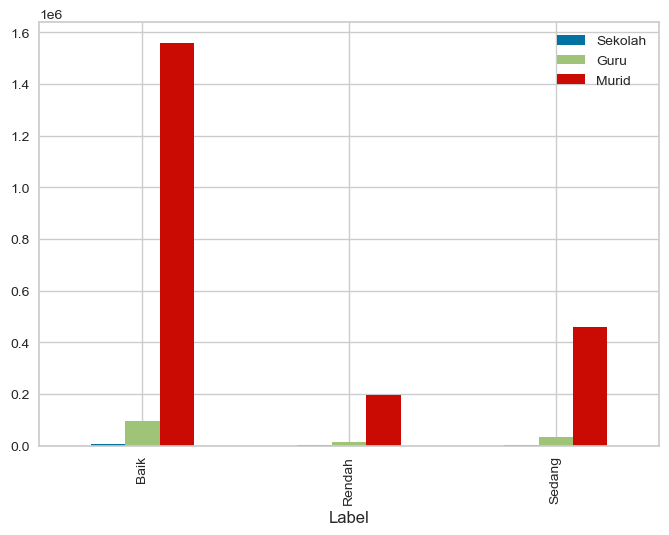

In [290]:
df_new['Label']=df_new.Label.replace({0:"Baik", 1:"Sedang", 2:"Rendah"})
df_plot = df_new.groupby('Label').agg({"Sekolah":np.mean, "Guru":np.mean, "Murid":np.mean}).reset_index()
df_plot.plot(x="Label", y=["Sekolah", "Guru", "Murid"], kind="bar")

Note : 

Label 0 : Klaster Baik

Label 1 : Klaster Sedang

Label 2 : Klaster Rendah

In [291]:
df_new

,No,Provinsi,Sekolah,Guru,Murid,Label
0,1,Aceh,3529,48541,486958,Sedang
1,2,Sumatera Utara,9782,109585,1548652,Baik
2,3,Sumatera Barat,4260,46833,597218,Sedang
3,4,Riau,3791,51378,773526,Baik
4,5,Jambi,2463,27161,368694,Sedang
5,6,Sumatera Selatan,4696,59861,882534,Baik
6,7,Bengkulu,1398,16035,194381,Rendah
7,8,Lampung,4732,57711,799619,Baik
8,9,Kepulauan Bangka Belitung,832,9678,162722,Rendah
9,10,Kepulauan Riau,973,14033,225575,Rendah


In [292]:
df_new.to_csv("SD_Klasterisasi_Dengan_Outlier.csv")

#### Tanpa Outlier

In [293]:
df = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/k_means_clustering/main/SD.csv', sep=';')

In [294]:
df3 = df[["Sekolah", "Guru", "Murid"]]

In [295]:
km_model = KMeans(n_clusters=3, random_state=10)              # instatiate KMeans class and set the number of clusters
cluster_result = km_model.fit_predict(df3)                    # call fit method with data 
centroids = km_model.cluster_centers_                         # coordinates of cluster center
labels = km_model.labels_                                     # cluster label for each data point

In [296]:
df["Label"] = labels

In [297]:
df_plot = df.groupby('Label').agg({"Sekolah":np.mean, "Guru":np.mean, "Murid":np.mean}).reset_index()
df_plot

# Menampilkan Rata2 Variabel 

,Label,Sekolah,Guru,Murid
0,0,2725.566667,30753.533333,4.288613e+05
1,1,19659.000000,212849.000000,4.450934e+06
2,2,15849.666667,156684.666667,2.253246e+06


In [298]:
df['Label']=df.Label.replace({1:"Baik", 2:"Sedang", 0:"Rendah"})

In [299]:
df

,No,Provinsi,Sekolah,Guru,Murid,Label
0,1,Aceh,3529,48541,486958,Rendah
1,2,Sumatera Utara,9782,109585,1548652,Sedang
2,3,Sumatera Barat,4260,46833,597218,Rendah
3,4,Riau,3791,51378,773526,Rendah
4,5,Jambi,2463,27161,368694,Rendah
5,6,Sumatera Selatan,4696,59861,882534,Rendah
6,7,Bengkulu,1398,16035,194381,Rendah
7,8,Lampung,4732,57711,799619,Rendah
8,9,Kepulauan Bangka Belitung,832,9678,162722,Rendah
9,10,Kepulauan Riau,973,14033,225575,Rendah


In [300]:
figure = plotly_express.scatter_3d(df,
                 x='Guru', y='Murid',
                 z='Sekolah', color="Label", text="Provinsi",
                 title="Sebaran Provinsi Berdasarkan Data Sekolah Dasar")
 
figure.update_layout(showlegend=True)
 
figure.show()

<Axes: xlabel='Label'>

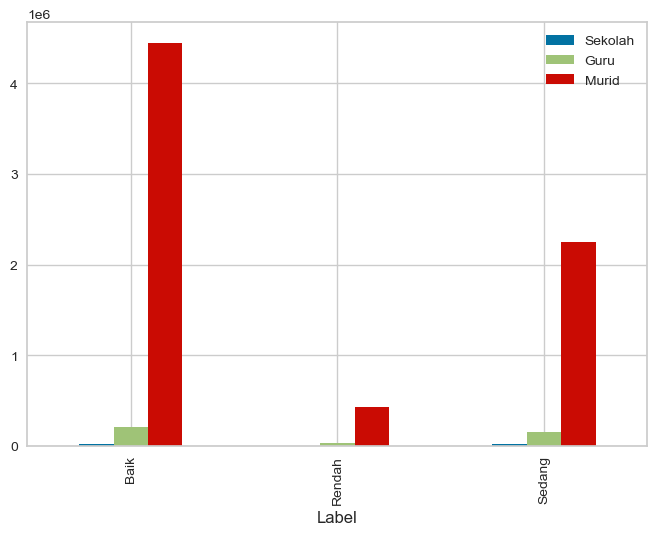

In [301]:
df_plot = df.groupby('Label').agg({"Sekolah":np.mean, "Guru":np.mean, "Murid":np.mean}).reset_index()
df_plot.plot(x="Label", y=["Sekolah", "Guru", "Murid"], kind="bar")